In [1]:
pip install git+https://github.com/mjkvaak/ImageDataAugmentor

  Cloning https://github.com/mjkvaak/ImageDataAugmentor to c:\users\raj\appdata\local\temp\pip-req-build-xu_fg9zk
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/mjkvaak/ImageDataAugmentor 'C:\Users\Raj\AppData\Local\Temp\pip-req-build-xu_fg9zk'
You should consider upgrading via the 'C:\Users\Raj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install -U albumentations[imgaug]

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install -U albumentations

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from ImageDataAugmentor.image_data_augmentor import *

In [5]:
import glob
import pandas as pd
import os
import numpy as np
import imageio
from PIL import Image
from matplotlib import pyplot
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from skimage.transform import resize
from efficientnet.tfkeras import EfficientNetB4

In [6]:
covid=os.listdir(r'C:\Users\Raj\Downloads\covid\COVID-19_Radiography_Dataset\COVID')
normal=os.listdir(r'C:\Users\Raj\Downloads\covid\COVID-19_Radiography_Dataset\Normal')

In [7]:
cov=list(zip(covid,['covid']*(len(covid))))
covid_df = pd.DataFrame(cov,columns=['file','label']) 
covid_df.head()

,file,label
0,COVID-1.png,covid
1,COVID-10.png,covid
2,COVID-100.png,covid
3,COVID-1000.png,covid
4,COVID-1001.png,covid


In [8]:
norm=list(zip(normal,['normal']*(len(normal))))
normal_df = pd.DataFrame(norm,columns=['file','label']) 
normal_df.head()

,file,label
0,Normal-1.png,normal
1,Normal-10.png,normal
2,Normal-100.png,normal
3,Normal-1000.png,normal
4,Normal-10000.png,normal


In [9]:
dataframe=pd.concat([covid_df,normal_df])
dataframe.head()

,file,label
0,COVID-1.png,covid
1,COVID-10.png,covid
2,COVID-100.png,covid
3,COVID-1000.png,covid
4,COVID-1001.png,covid


In [10]:
df = pd.get_dummies(dataframe['label'])
df.head()

,covid,normal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
df = pd.concat([dataframe, df], axis=1)
df.head()

,file,label,covid,normal
0,COVID-1.png,covid,1,0
1,COVID-10.png,covid,1,0
2,COVID-100.png,covid,1,0
3,COVID-1000.png,covid,1,0
4,COVID-1001.png,covid,1,0


In [12]:
df=df.sample(frac=1)

In [13]:
df

,file,label,covid,normal
2315,Normal-2909.png,normal,0,1
6526,Normal-67.png,normal,0,1
10170,Normal-998.png,normal,0,1
4398,Normal-4784.png,normal,0,1
6253,Normal-6453.png,normal,0,1
...,...,...,...,...
3113,COVID-546.png,covid,1,0
4812,Normal-5156.png,normal,0,1
136,Normal-1012.png,normal,0,1
983,Normal-171.png,normal,0,1


In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from albumentations import *

In [15]:
aug=Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
            
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.3),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.3),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        #HueSaturationValue(p=0.3),
    ], p=1)

C:\Users\Raj\anaconda3\lib\site-packages\albumentations\imgaug\transforms.py:252: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
C:\Users\Raj\anaconda3\lib\site-packages\albumentations\imgaug\transforms.py:290: FutureWarning: This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead
  warnings.warn("This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead", FutureWarning)
C:\Users\Raj\anaconda3\lib\site-packages\albumentations\imgaug\transforms.py:222: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
C:\Users\Raj\anaconda3\lib\site-packages\albumentations\imgaug\transforms.py:165: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please 

In [16]:
from ImageDataAugmentor.image_data_augmentor import *
data_gen= ImageDataAugmentor(
    #horizontal_flip=True,
    #vertical_flip=True,
    #rotation_range=90,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # zoom_range=.2,
    rescale=1/255,
    # fill_mode='nearest',
    # shear_range=0.2,
    # brightness_range=[0.2, 2.0],
    augment =aug)

In [17]:
img_shape=64
batch_size=32

In [18]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

In [19]:
pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to c:\users\raj\appdata\local\temp\pip-req-build-thuio77r
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/qubvel/efficientnet 'C:\Users\Raj\AppData\Local\Temp\pip-req-build-thuio77r'
You should consider upgrading via the 'C:\Users\Raj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [20]:
from sklearn.model_selection import KFold
import gc

from sklearn.metrics import classification_report,accuracy_score,f1_score
classification_reports=[]
kf = KFold(n_splits=5)
history=[]
accuracy=[]
f1_scores=[]
fold=0
for train_index, test_index in kf.split(df):
  train=df.iloc[train_index,:]
  val=df.iloc[test_index,:]
  print('-----------fold {}--------------'.format(fold))
  train_generator=data_gen.flow_from_dataframe(train,directory='C:/Users/Raj/Downloads/covid/data',
                                                      target_size=(img_shape,img_shape),
                                                      x_col="file",
                                                      y_col=['covid','normal'],
                                                      class_mode='raw',
                                                      shuffle=True,
                                                      batch_size=batch_size)

  val_generator=data_gen.flow_from_dataframe(val,directory='C:/Users/Raj/Downloads/covid/data',
                                                        target_size=(img_shape,img_shape),
                                                        x_col="file",
                                                        y_col=['covid','normal'],
                                                        class_mode='raw',
                                                        shuffle=False,
                                                        batch_size=batch_size)
  #train_generator.next()[0].shape,train_generator.next()[1].shape
  import efficientnet.tfkeras as efn
  model =efn.EfficientNetB4(weights ='noisy-student', include_top=False, input_shape = (img_shape,img_shape,3))
    
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.3)(x)
  x = Dense(128, activation="relu")(x)
  #x = Dropout(0.3)(x)
  x = Dense(64, activation="relu")(x)
  predictions = Dense(2, activation="sigmoid")(x)
  model = Model(inputs=model.input, outputs=predictions)

  def custom_loss(y_true, y_pred):
      return tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)
  model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

  results = model.fit(train_generator,epochs=11,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                              validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=3, lr=0.01),
                                         ModelCheckpoint('models_{}.hdf5'.format(fold), save_best_only=True, monitor='val_loss', mode='min')
                                         ])
  model.load_weights('modelss_{}.hdf5'.format(fold))
  val_generator.reset()
  y_pred=model.predict(val_generator,steps=val_generator.n/batch_size,verbose=1)
  y_pred=y_pred.round().astype(int)
  y_true=val.iloc[:,2::]
  classification_reports.append(classification_report(y_true, y_pred,target_names=['covid','normal']))#
  accuracy.append(accuracy_score(y_true,y_pred))
  f1=f1_score(y_true,y_pred,average='macro')
  print('f1 score is ', f1)
  f1_scores.append(f1)
  fold+=1


-----------fold 0--------------
Found 11046 validated image filenames.
Found 2762 validated image filenames.
Epoch 1/11
345/345 [==============================] - 645s 2s/step - loss: 0.5450 - accuracy: 0.7654 - val_loss: 0.6316 - val_accuracy: 0.8034
Epoch 2/11
345/345 [==============================] - 614s 2s/step - loss: 0.4218 - accuracy: 0.8636 - val_loss: 0.3668 - val_accuracy: 0.8983
Epoch 3/11
345/345 [==============================] - 610s 2s/step - loss: 0.3966 - accuracy: 0.8784 - val_loss: 0.3643 - val_accuracy: 0.9026
Epoch 4/11
345/345 [==============================] - 617s 2s/step - loss: 0.3553 - accuracy: 0.9056 - val_loss: 0.3632 - val_accuracy: 0.9012
Epoch 5/11
345/345 [==============================] - 618s 2s/step - loss: 0.3339 - accuracy: 0.9156 - val_loss: 0.3311 - val_accuracy: 0.9189
Epoch 6/11
345/345 [==============================] - 624s 2s/step - loss: 0.3273 - accuracy: 0.9219 - val_loss: 0.3010 - val_accuracy: 0.9410
Epoch 7/11
345/345 [=============

C:\Users\Raj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1 score is  0.765977606044146
-----------fold 1--------------
Found 11046 validated image filenames.
Found 2762 validated image filenames.
Epoch 1/11
345/345 [==============================] - 651s 2s/step - loss: 0.5535 - accuracy: 0.7553 - val_loss: 0.4675 - val_accuracy: 0.8320
Epoch 2/11
345/345 [==============================] - 633s 2s/step - loss: 0.4189 - accuracy: 0.8574 - val_loss: 0.4122 - val_accuracy: 0.8729
Epoch 3/11
345/345 [==============================] - 636s 2s/step - loss: 0.3873 - accuracy: 0.8831 - val_loss: 0.3639 - val_accuracy: 0.8878
Epoch 4/11
345/345 [==============================] - 637s 2s/step - loss: 0.3786 - accuracy: 0.8926 - val_loss: 0.3402 - val_accuracy: 0.9131
Epoch 5/11
345/345 [==============================] - 627s 2s/step - loss: 0.3445 - accuracy: 0.9109 - val_loss: 0.3183 - val_accuracy: 0.9251
Epoch 6/11
345/345 [==============================] - 627s 2s/step - loss: 0.3434 - accuracy: 0.9083 - val_loss: 0.2954 - val_accuracy: 0.9424
Ep

In [26]:
accuracy

[0.775524981897176,
 0.2632150615496017,
 0.7324402606806661,
 0.7037305324157914,
 0.7852227453821079]

In [27]:
classification_reports

['              precision    recall  f1-score   support\n\n       covid       0.79      0.55      0.65       769\n      normal       0.84      0.93      0.88      1993\n\n   micro avg       0.83      0.83      0.83      2762\n   macro avg       0.81      0.74      0.77      2762\nweighted avg       0.82      0.83      0.82      2762\n samples avg       0.80      0.83      0.81      2762\n',
 '              precision    recall  f1-score   support\n\n       covid       0.32      0.90      0.47       689\n      normal       0.75      1.00      0.86      2073\n\n   micro avg       0.57      0.98      0.72      2762\n   macro avg       0.53      0.95      0.66      2762\nweighted avg       0.64      0.98      0.76      2762\n samples avg       0.62      0.98      0.74      2762\n',
 '              precision    recall  f1-score   support\n\n       covid       0.69      0.72      0.71       727\n      normal       0.83      0.91      0.87      2035\n\n   micro avg       0.80      0.86      0.

In [28]:
f1_scores

[0.765977606044146,
 0.6625589483061511,
 0.7888199241128058,
 0.765882866719461,
 0.7117564073923539]

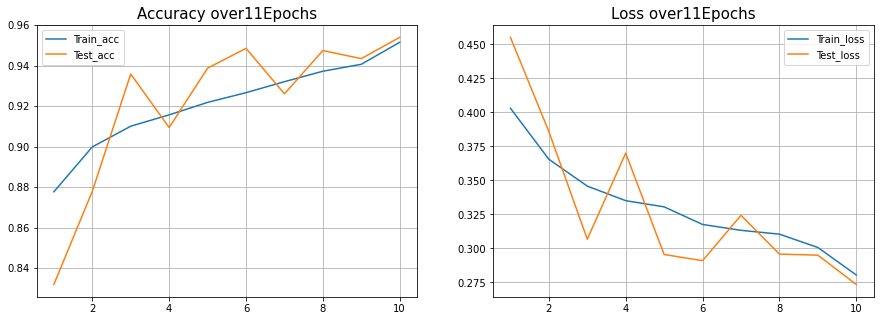

In [37]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 11)

In [30]:
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)